In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement:

### 2. Data Gathering:

In [2]:
df = pd.read_csv(r"C:\Data Science\Datasets\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 3. Exploratory Data Analysis:

##### shape

In [4]:
df.shape

(5110, 12)

##### Null Values

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### DataType

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##### unique values

In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

##### duplicates

In [8]:
df.duplicated().sum()

0

##### Statistics

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: title={'center': 'Target Column'}, xlabel='stroke', ylabel='count'>

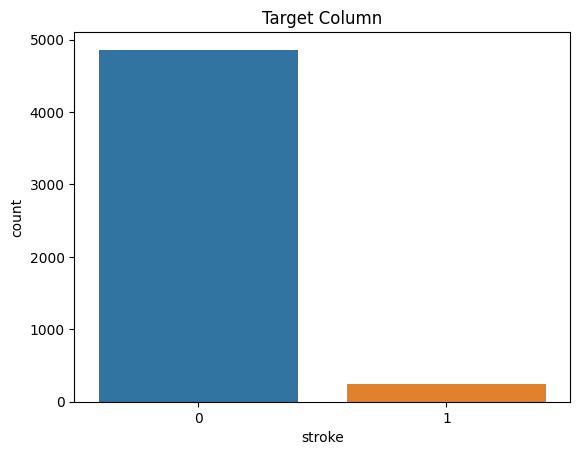

In [10]:
plt.title('Target Column')
sns.countplot(x = df['stroke'])

         The Target Column is highly imbalance with lot of class 0 values

In [11]:
object_columns = df.select_dtypes(include =object).columns
numerical_columns = df.select_dtypes(exclude= object).columns

print(f'we have {len(object_columns)} object features such as {object_columns}')
print("-"*80)
print(f'we have {len(numerical_columns)} numerical features such as {numerical_columns}')

we have 5 object features such as Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
--------------------------------------------------------------------------------
we have 7 numerical features such as Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='gender', ylabel='hypertension'>

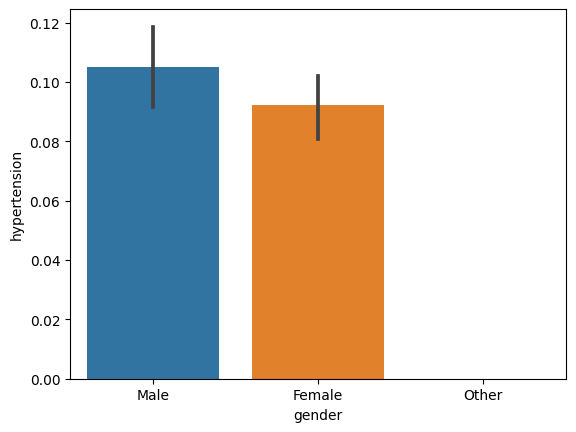

In [13]:
sns.barplot(y = df['hypertension'],x = df['gender'])

                 Male have more hypertension, as compare to Female

<Axes: xlabel='bmi', ylabel='Frequency'>

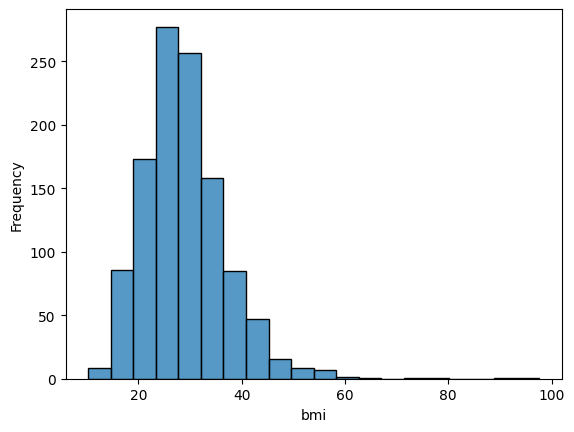

In [14]:
sns.histplot(x = df['bmi'],bins=20,stat='frequency')

In [15]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Text(0.5, 1.0, 'Smoking Status')

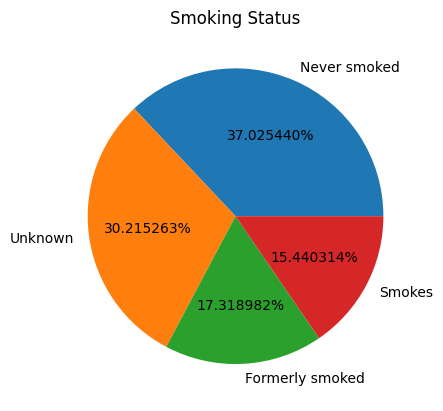

In [16]:
smoking_index = df['smoking_status'].value_counts()
l = 'Never smoked','Unknown','Formerly smoked','Smokes'
plt.pie(smoking_index,labels=l,autopct = '%2f%%')
plt.title('Smoking Status')

In [17]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Text(0.5, 1.0, 'Work Type')

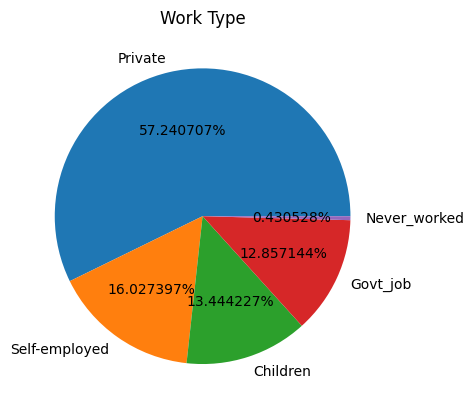

In [18]:
work_index = df['work_type'].value_counts()
l = 'Private','Self-employed','Children','Govt_job','Never_worked'
plt.pie(work_index,labels=l,autopct = '%2f%%')
plt.title('Work Type')

### 4. Feature Engineering 

Updating the values of features

#### Handling Missing Values

In [19]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
np.around(df['bmi'].median())

28.0

In [21]:
df['bmi'].fillna(np.around(df['bmi'].median()),inplace = True)

####  Encoding 

* id

In [22]:
df.drop('id',axis =1,inplace = True)

* gender

In [23]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [24]:
df['gender'].replace({'Male':1, 'Female':0, 'Other':2},inplace =True)

* ever_married

In [25]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [26]:
df['ever_married'].replace({'Yes':1,'No':0},inplace =True)

* Residence_type

In [27]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [28]:
df['Residence_type'].replace({'Urban':1, 'Rural':0},inplace = True)

#### One Hot Encoding

* work_type
* smoking_status

In [29]:
df = pd.get_dummies(df,columns = ['work_type','smoking_status'],dtype=int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   int32  
 10  work_type_Never_worked          5110 non-null   int32  
 11  work_type_Private               5110 non-null   int32  
 12  work_type_Self-employed         51

In [31]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.0,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.0,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


#### Outliers

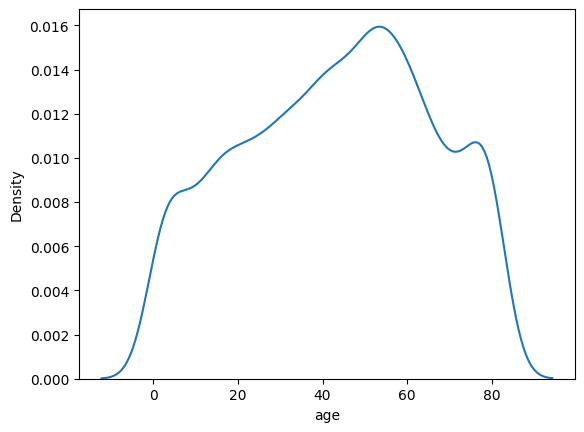

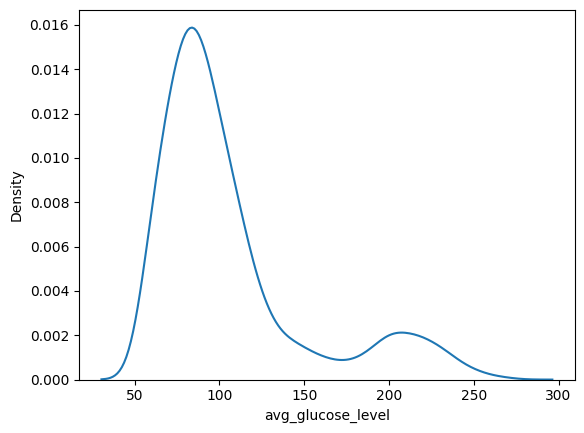

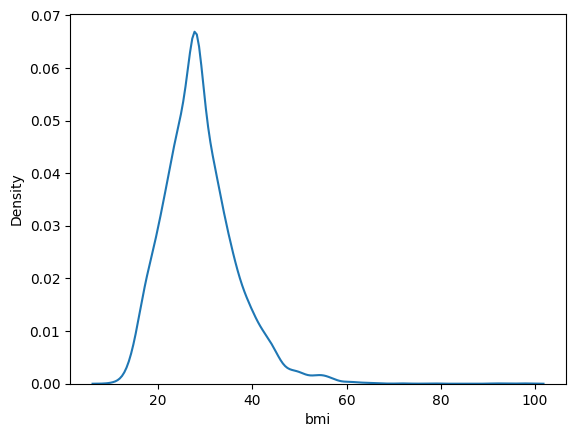

In [32]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    sns.kdeplot(df[column])
    plt.show()

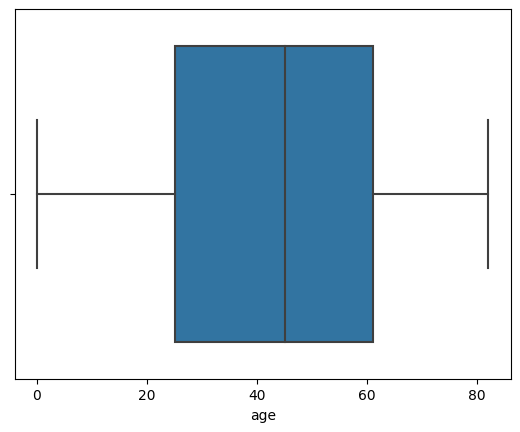

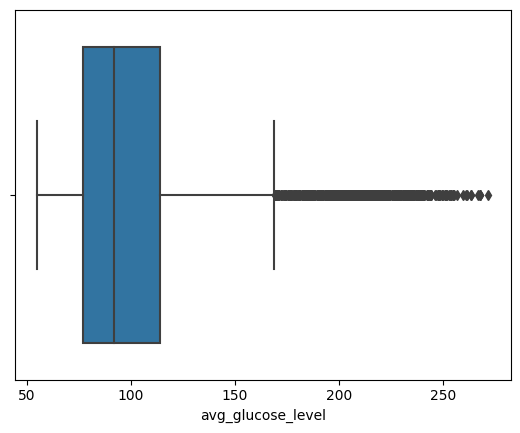

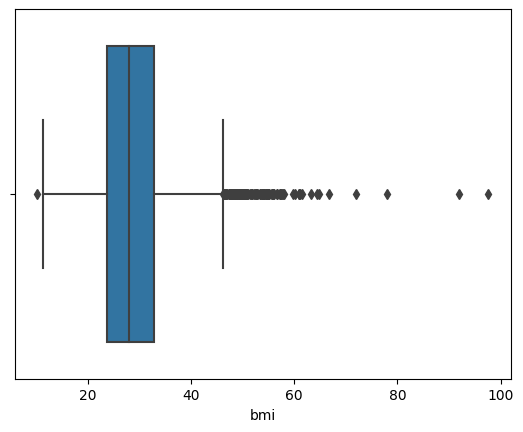

In [33]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    sns.boxplot(x =df[column])
    plt.show()

In [34]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    print(column)
    
    q1 = np.quantile(df[column],0.25)
    q2 = np.quantile(df[column],0.50)
    q3 = np.quantile(df[column],0.75)

    print("Q1 :",q1)
    print("Q2 :",q2)
    print("Q3 :",q3)

    iqr = q3-q1
    print("IQR is :",iqr)

    upper_tail = q3 + 1.5 * iqr
    print("Upper Tail :", upper_tail)

    lower_tail = q1 -1.5*iqr
    print("Lower Tail :", lower_tail)
    
    outliers = []
    for Xi in df[column]:
        if Xi > upper_tail:
            outliers.append(Xi)
    print('Outliers : ',len(outliers))
    
    print('-'*50)

age
Q1 : 25.0
Q2 : 45.0
Q3 : 61.0
IQR is : 36.0
Upper Tail : 115.0
Lower Tail : -29.0
Outliers :  0
--------------------------------------------------
avg_glucose_level
Q1 : 77.245
Q2 : 91.88499999999999
Q3 : 114.09
IQR is : 36.845
Upper Tail : 169.35750000000002
Lower Tail : 21.977500000000006
Outliers :  627
--------------------------------------------------
bmi
Q1 : 23.8
Q2 : 28.0
Q3 : 32.8
IQR is : 8.999999999999996
Upper Tail : 46.29999999999999
Lower Tail : 10.300000000000006
Outliers :  125
--------------------------------------------------


#### Box-Cox Transformation

* avg_glucose_level

In [35]:
from scipy.stats import boxcox

In [36]:
df['avg_glucose_level']=boxcox(df['avg_glucose_level'])[0]

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

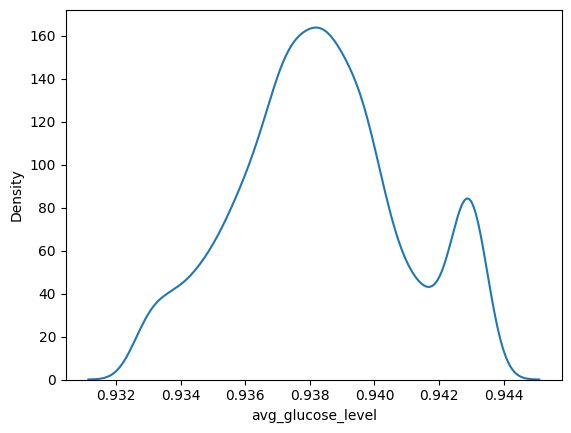

In [37]:
sns.kdeplot(df['avg_glucose_level'])

<Axes: xlabel='avg_glucose_level'>

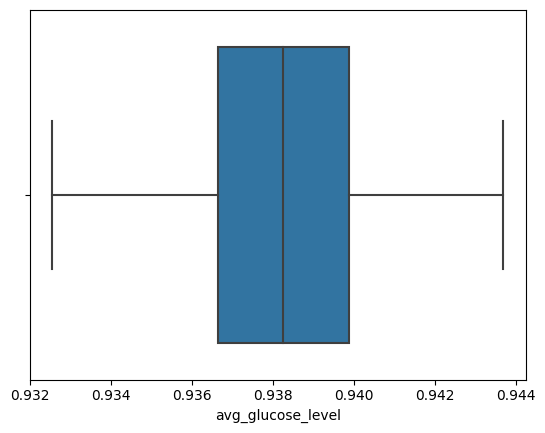

In [38]:
sns.boxplot(x = df['avg_glucose_level'])

* bmi

<Axes: xlabel='bmi', ylabel='Density'>

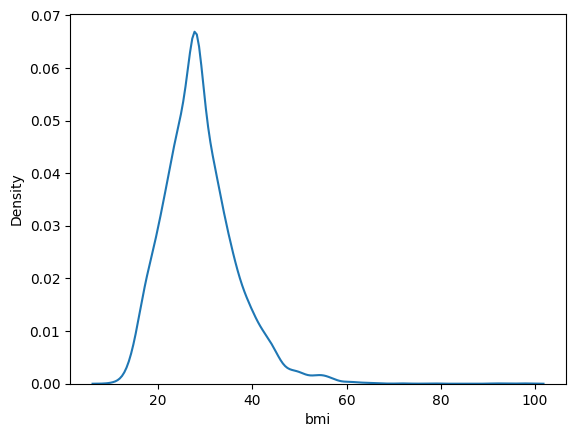

In [39]:
sns.kdeplot(df['bmi'])

<Axes: >

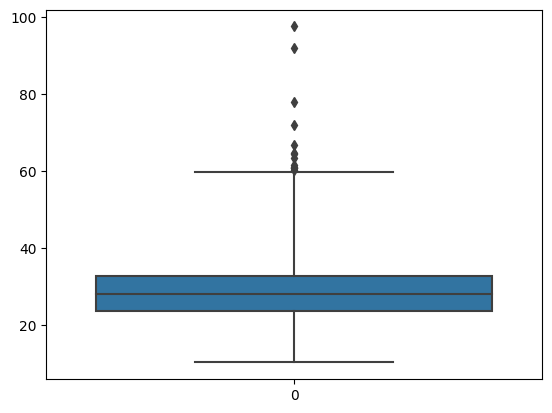

In [40]:
sns.boxplot(df['bmi'], whis = 3)

In [41]:
q1 = np.quantile(df['bmi'],0.25)
q2 = np.quantile(df['bmi'],0.50)
q3 = np.quantile(df['bmi'],0.75)

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)

iqr = q3-q1
print("IQR is :",iqr)

upper_tail = q3 + 3 *iqr
print("Upper Tail :", upper_tail)

lower_tail = q3 - 3 *iqr
print("Lower Tail :", lower_tail)

Q1 : 23.8
Q2 : 28.0
Q3 : 32.8
IQR is : 8.999999999999996
Upper Tail : 59.79999999999998
Lower Tail : 5.800000000000008


In [42]:
outliers = []
for Xi in df['bmi']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
len(outliers)

13

####  Imputation 

In [43]:
df.loc[df['bmi']>upper_tail,'bmi'] = upper_tail

<Axes: >

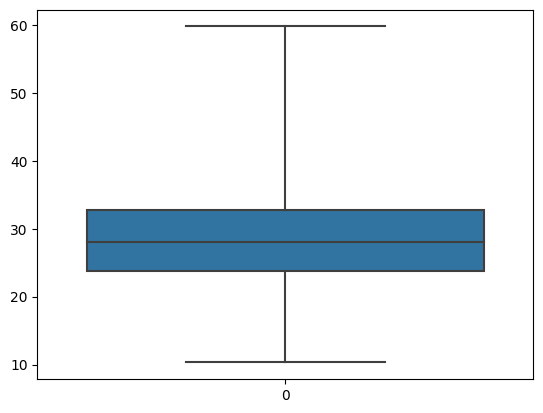

In [44]:
sns.boxplot(df['bmi'],whis = 3)

In [45]:
outliers = []
for Xi in df['bmi']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
len(outliers)

0

### Sampling

In [46]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,0.943185,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,0.942763,28.0,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,0.939370,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,0.942098,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,0.942171,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,0.937439,28.0,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,0.940480,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,0.937354,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,0.941969,25.6,0,0,0,1,0,0,0,1,0,0


#### SMOTE

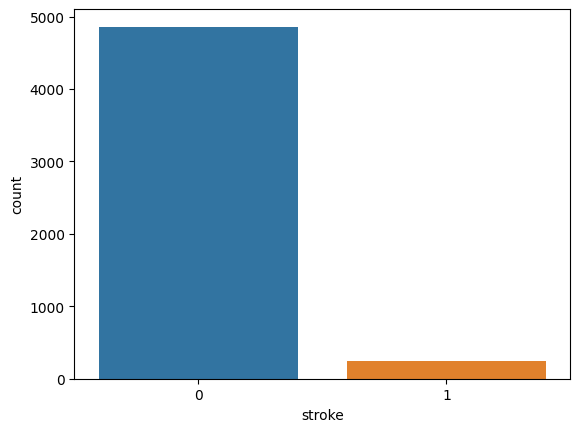

In [47]:
sns.countplot(x = df['stroke'])
plt.show()

In [48]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [57]:
x = df.drop('stroke',axis = 1)
y = df['stroke']

smote = SMOTE(sampling_strategy = 0.8)
df, df['stroke'] = smote.fit_resample(x,y)

In [62]:
df['stroke'].value_counts()

stroke
0    4861
1    3888
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

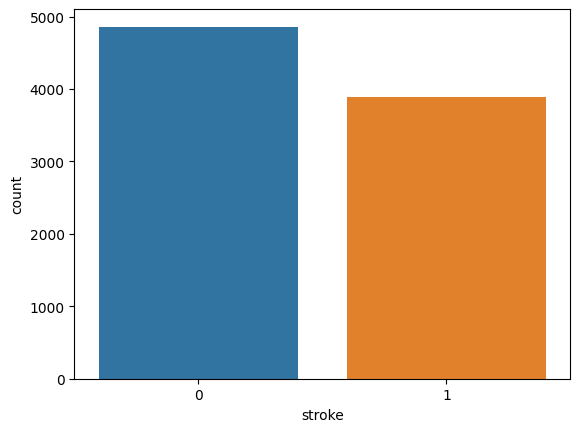

In [63]:
sns.countplot(x = df['stroke'])

<Axes: xlabel='stroke', ylabel='count'>

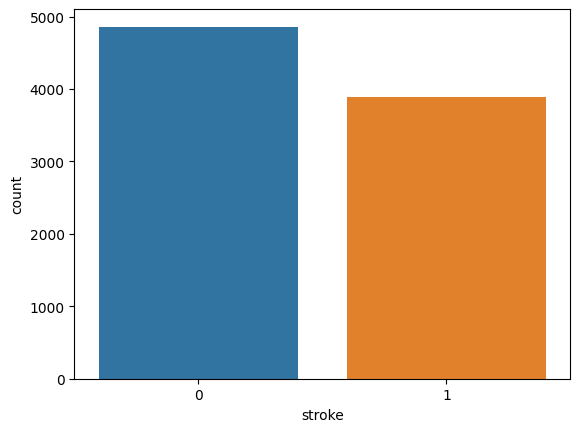

In [64]:
sns.countplot(x = df['stroke'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8749 entries, 0 to 8748
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          8749 non-null   int64  
 1   age                             8749 non-null   float64
 2   hypertension                    8749 non-null   int64  
 3   heart_disease                   8749 non-null   int64  
 4   ever_married                    8749 non-null   int64  
 5   Residence_type                  8749 non-null   int64  
 6   avg_glucose_level               8749 non-null   float64
 7   bmi                             8749 non-null   float64
 8   work_type_Govt_job              8749 non-null   int32  
 9   work_type_Never_worked          8749 non-null   int32  
 10  work_type_Private               8749 non-null   int32  
 11  work_type_Self-employed         8749 non-null   int32  
 12  work_type_children              87

### Correlation Heatmap

<Axes: >

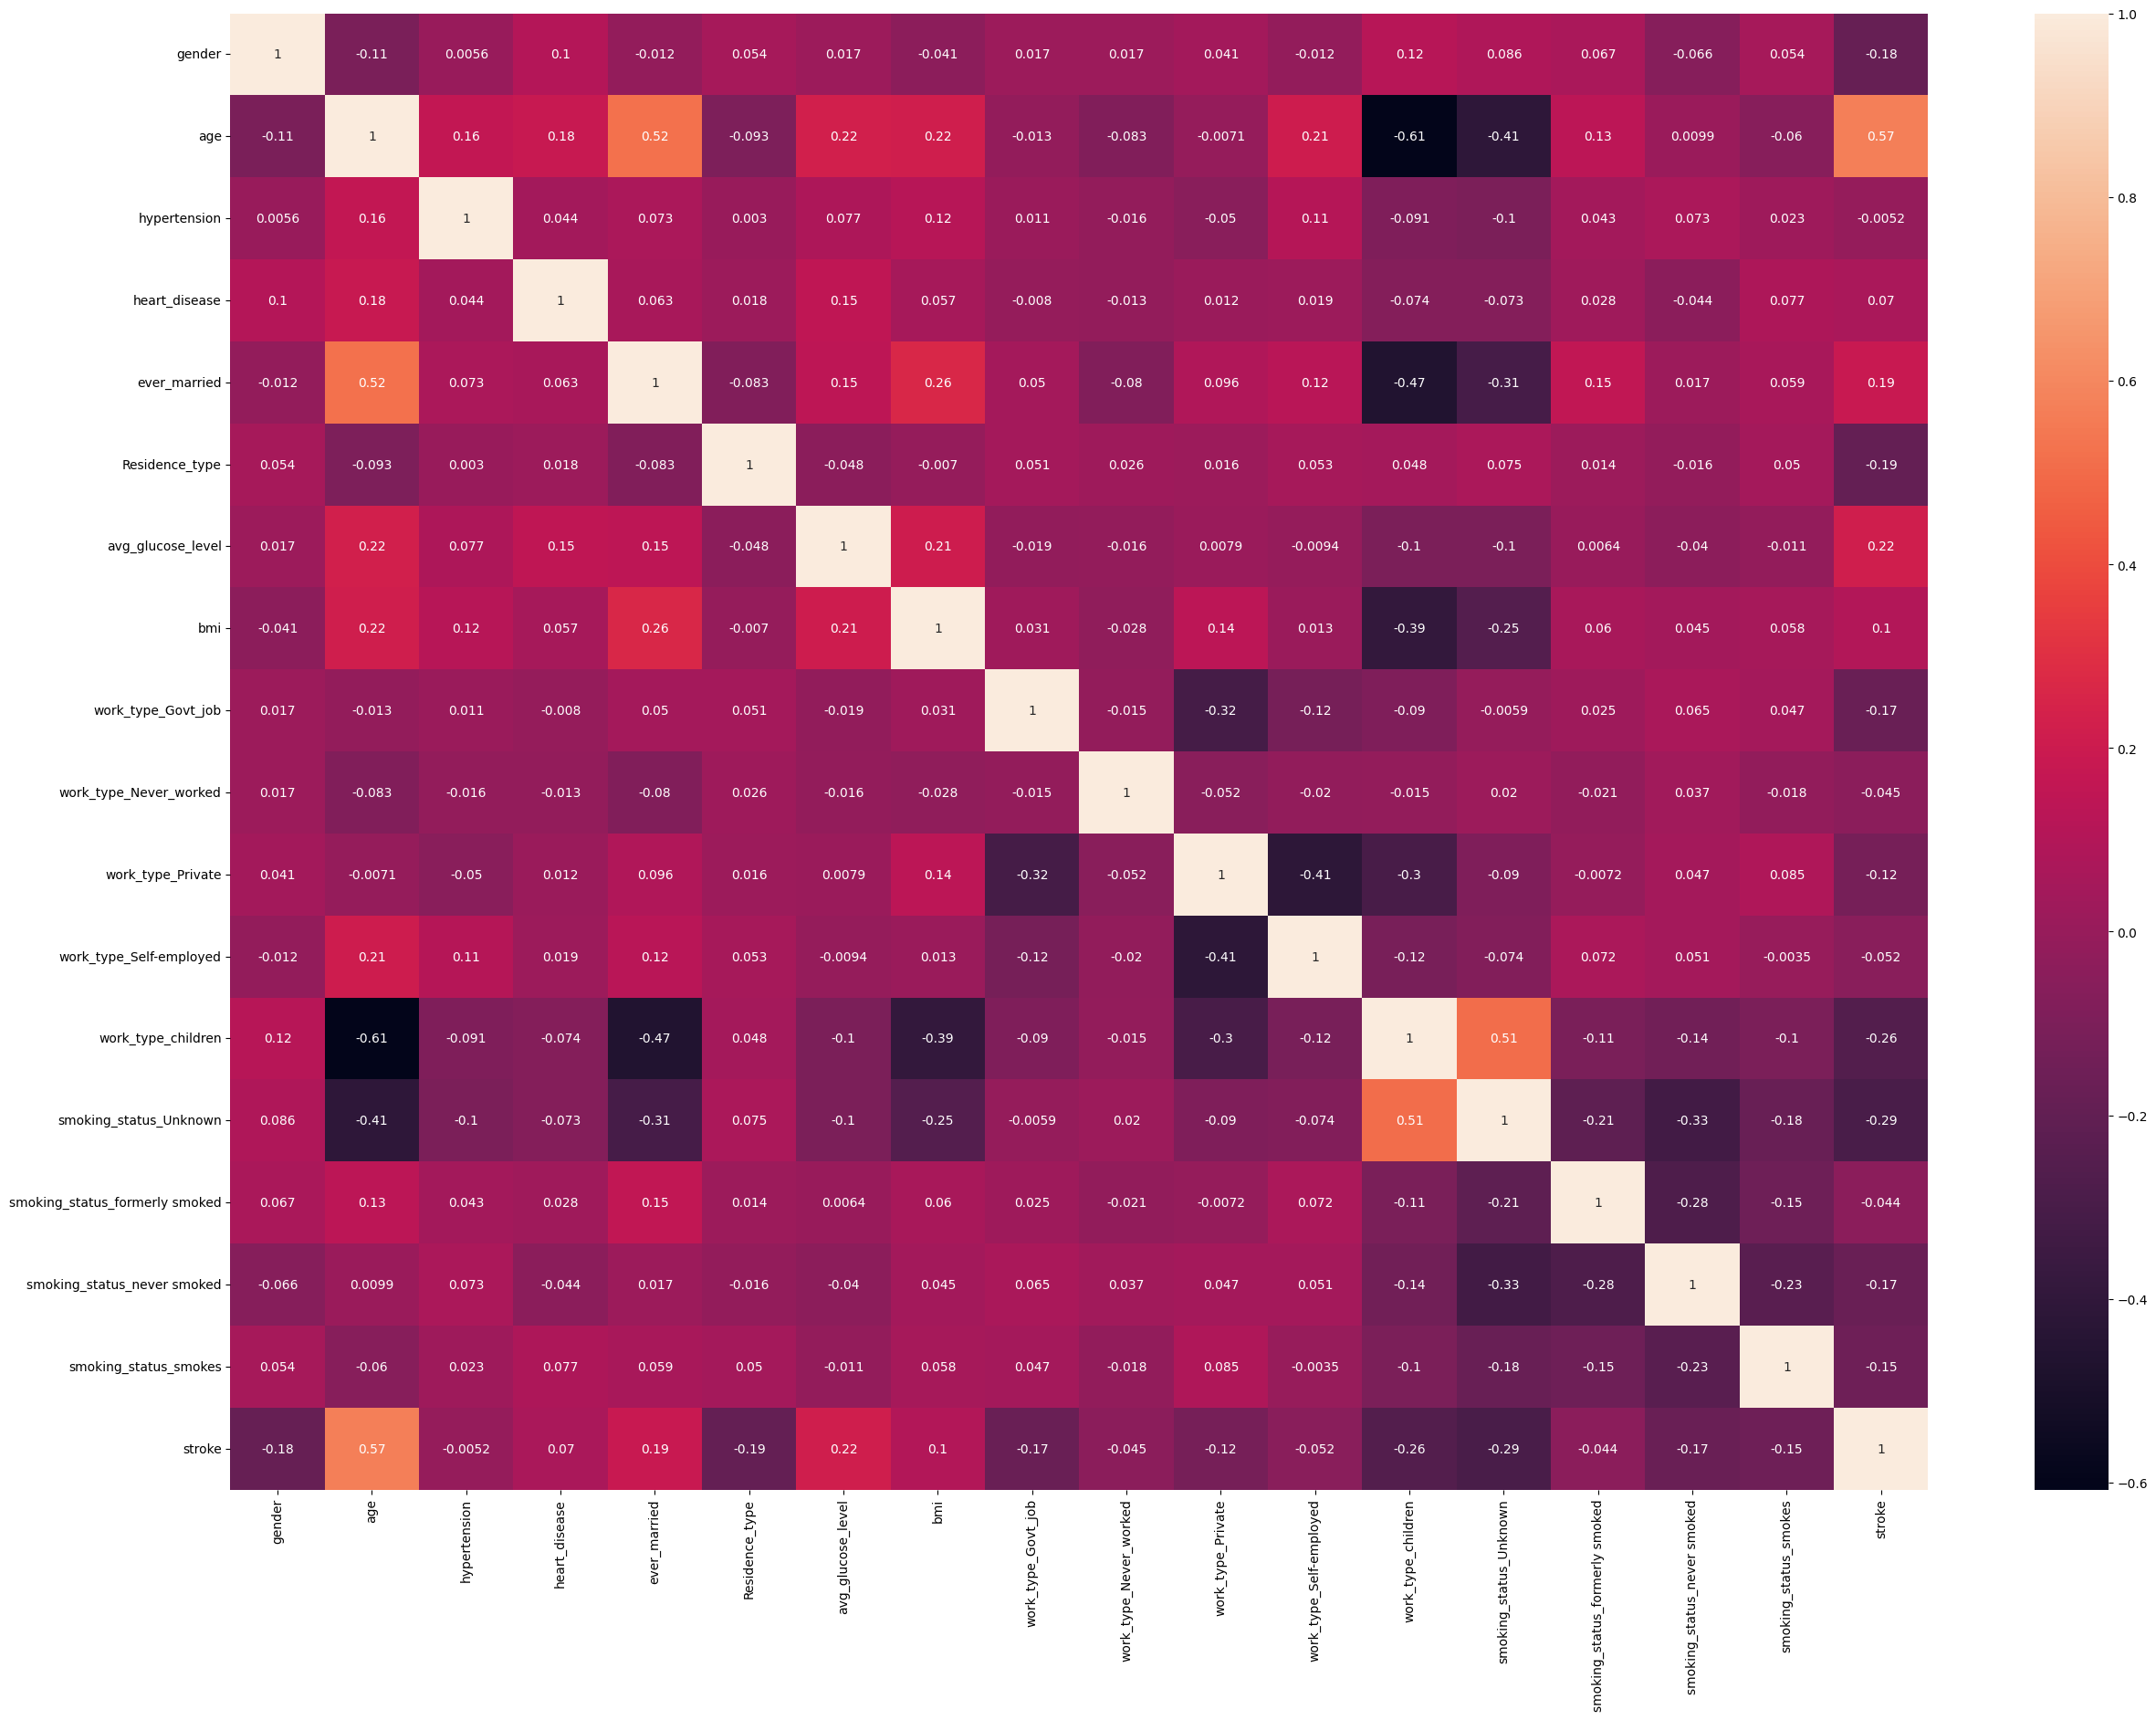

In [66]:
plt.figure(figsize=(30,21))
sns.heatmap(df.corr(), annot= True)

### Train Test Split 

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x = df.drop('stroke',axis = 1)
y = df['stroke']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6999, 17), (1750, 17), (6999,), (1750,))

### Logistic regression Model

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train,y_train)

LogisticRegression()

In [100]:
pred = logistic_clf.predict(x_test)[50:60]
pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [93]:
y_test[50:60]

6027    1
2579    0
7567    1
8682    1
4686    0
4215    0
6864    1
6577    1
8508    1
5143    1
Name: stroke, dtype: int64

### Evaluation Matrics

In [94]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, roc_curve

#### test

In [111]:
y_pred_test = logistic_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[899  62]
 [107 682]]
--------------------------------------------------
Accuracy :
 0.9034285714285715
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       961
           1       0.92      0.86      0.89       789

    accuracy                           0.90      1750
   macro avg       0.91      0.90      0.90      1750
weighted avg       0.90      0.90      0.90      1750



In [113]:
y_pred_train = logistic_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3660  240]
 [ 442 2657]]
--------------------------------------------------
Accuracy :
 0.9025575082154593
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      3900
           1       0.92      0.86      0.89      3099

    accuracy                           0.90      6999
   macro avg       0.90      0.90      0.90      6999
weighted avg       0.90      0.90      0.90      6999



#### Logistic Regression model has 90% of testing accuracy and 90% of training accuracy`